In [35]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
import json
from PIL import Image

In [2]:

# Chargement du modèle VGG16 pré-entraîné
vgg16 = models.vgg16(pretrained=True).cuda()
vgg16.eval()  # Mettre le modèle en mode évaluation


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:04<00:00, 125MB/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [14]:
# Définir des données d'entrée aléatoires
batch_size = 1
input_shape = (3, 224, 224) # Forme de l'entrée VGG16 (canaux, hauteur, largeur)
random_data = torch.randn(batch_size, *input_shape).cuda() # Générer des données aléatoires

In [15]:
# Prétraitement des données d'entrée selon les exigences du VGG16
preprocess = transforms.Compose([
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [16]:
# Appliquer le prétraitement aux données aléatoires
input_data = preprocess(random_data)

In [19]:
vgg16(input_data).shape

torch.Size([1, 1000])

In [22]:
features=vgg16.features(input_data)

In [26]:
features.shape

torch.Size([1, 512, 7, 7])

In [44]:
features_0_4=vgg16.features[0:5](input_data)
print(features_0_4.shape)

torch.Size([1, 64, 112, 112])


In [23]:
features_pooled=vgg16.avgpool(features)

In [25]:
features_pooled.shape

torch.Size([1, 512, 7, 7])

In [27]:
features_pooled=torch.flatten(features_pooled, 1)

In [28]:
cls=vgg16.classifier(features_pooled)

In [29]:
cls.shape

torch.Size([1, 1000])

In [45]:
# Définir les transformations de l'image
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Chargement et prétraitement de l'image
image_path = 'n01817953_African_grey.JPEG'  # Remplacer par votre chemin d'accès à l'image
input_image = Image.open(image_path)

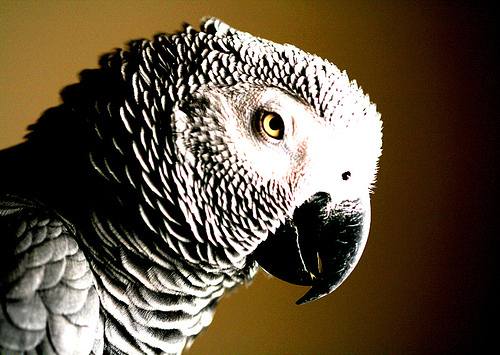

In [46]:
input_image

In [47]:

input_tensor = transform(input_image)
input_batch = input_tensor.unsqueeze(0).cuda()  # Ajouter une dimension de lot

# Effectuer une inférence
with torch.no_grad():
    output = vgg16(input_batch)

# Charger les étiquettes des classes ImageNet
with open('imagenet_class_index.json', 'r') as f:
    class_idx = json.load(f)

# Charger les étiquettes des classes ImageNet
_, predicted_idx = torch.max(output, 1)
predicted_class_idx = predicted_idx.item()
predicted_label = class_idx[str(predicted_class_idx)][1]

print(f"Predicted class index: {predicted_class_idx}")
print(f"Predicted label: {predicted_label}")

Predicted class index: 87
Predicted label: African_grey
